In [14]:
import os
import sys

path = os.getcwd()
while os.path.basename(os.path.normpath(path)) != 'roman-pandeia':
        path = os.path.dirname(path)
repo_path = path
if repo_path not in sys.path:
    sys.path.append(repo_path)
    
import time
from pprint import pprint
from tqdm import tqdm
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'
import numpy as np
from glob import glob

from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.calc_utils import get_telescope_config, get_instrument_config, build_default_calc, build_default_source
from pandeia.engine.io_utils import read_json, write_json

from utils import image_utils

cwd = os.getcwd()

In [18]:
filename = os.path.join(cwd, 'lenstronomy_mosaic.png')
if os.path.exists(filename):
    os.remove(filename)

images = glob(cwd + '/model_*.png')
space = 0
columns = 5

image_utils.combine_images(columns, space, images, filename)

Converting to point sources...


100%|██████████| 45/45 [00:29<00:00,  1.54it/s]


Point source conversion complete
Performing Pandeia calculation...


Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:29<00:00,  1.52it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.61it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.64it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.62it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.63it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.64it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.64it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.63it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.61it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.63it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:29<00:00,  1.54it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:28<00:00,  1.59it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.62it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:28<00:00,  1.57it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:28<00:00,  1.59it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.62it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:28<00:00,  1.59it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:28<00:00,  1.59it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:28<00:00,  1.60it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:28<00:00,  1.61it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:30<00:00,  1.47it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:27<00:00,  1.62it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete
Converting to point sources...


100%|██████████| 45/45 [00:28<00:00,  1.56it/s]


Point source conversion complete
Performing Pandeia calculation...
Pandeia calculation complete


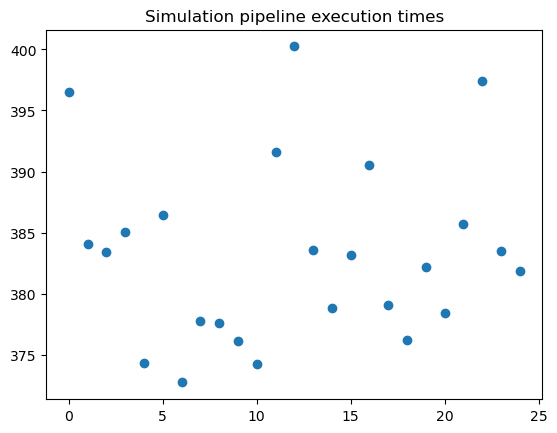

In [21]:
data_set_list = glob(cwd + '/model_*.png')
execution_times = []

oversample_factor = 1

for i, _ in enumerate(data_set_list):

    execution_start_time = time.time()

    # load lenstronomy model
    model = np.load(f'{i}.npy')

    calc = build_default_calc('roman','wfi','imaging')

    # don't allow scene size to change
    calc['configuration']['dynamic_scene'] = True
    calc['configuration']['max_scene_size'] = 5

    # change filter
    calc['configuration']['instrument']['filter'] = 'f106'

    # adjust brightness (np.interp for now)
    max = np.max(model)
    min = np.min(model)
    model = np.interp(model, (min, max), (0.00001, 0.001))

    j = 0
    side, _ = model.shape

    print('Converting to point sources...')
    for row_number, row in tqdm(enumerate(model), total=side):
        for item_number, item in enumerate(row):
            if j != 0:
                calc['scene'].append(build_default_source(geometry="point"))

            # set brightness
            calc['scene'][j]['spectrum']['normalization']['norm_flux'] = item
            
            # set position
            calc['scene'][j]['position']['x_offset'] = (item_number * (1 / 9) * (1 / oversample_factor)) + (-2.52)  # arcsec
            calc['scene'][j]['position']['y_offset'] = (row_number * (1 / 9) * (1 / oversample_factor)) + (-2.52)  # arcsec

            j += 1
    print('Point source conversion complete')

    print('Performing Pandeia calculation...')
    results = perform_calculation(calc)
    print('Pandeia calculation complete')

    detector = results['2d']['detector']

    # TODO TEMP! flip image
    detector = np.flipud(detector)
    # detector = np.fliplr(detector)

    f, axes = plt.subplots(1, 1, figsize=(6, 6), sharex='none', sharey='none')
    axes.matshow(detector, origin='lower')  # np.log10()
    axes.get_xaxis().set_visible(False)
    axes.get_yaxis().set_visible(False)
    axes.autoscale(False)
    f.savefig(os.path.join('sim', f'{i}_pandeia_{oversample_factor}.png'))
    plt.close()

    # save this numpy array
    pandeia_array_path = os.path.join('sim', f'{i}_pandeia_{oversample_factor}.npy')
    np.save(pandeia_array_path, detector)

    execution_end_time = time.time()
    execution_time = execution_end_time - execution_start_time
    execution_times.append(execution_time)

plt.scatter(np.arange(0, len(execution_times)), execution_times)
plt.title('Simulation pipeline execution times')
plt.show()
# plt.savefig('simulation_pipeline_execution_times.png')
np.save('simulation_pipeline_execution_times', execution_times)


In [22]:
sim_dir = os.path.join(cwd, 'sim')
filename = os.path.join(cwd, 'cnn_training_mosaic.png')
images = glob(sim_dir + '/*.png')
space = 0
columns = 5

image_utils.combine_images(columns, space, images, filename)